<a href="https://colab.research.google.com/github/Asifbbl/Zomato-Resturent-Clustering-and-Sentiment-Analysis/blob/main/Zomato_resturent_Clustering_and_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name :- Zomato Resturent Clustering and Sentiment Analysis**    - 



##### **Project Type**    - Unsupervised
##### **Contribution**    - Team
##### **Team Member 1 -** - Asif Ansari
##### **Team Member 2 -** - Anand Kumar

# **Project Summary -**

# **GitHub Link -**

GitHub Link - https://github.com/Asifbbl/Zomato-Resturent-Clustering-and-Sentiment-Analysis

# **Problem Statement**


Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.


The Project focuses on Customers and Company, you have to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.



# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [101]:
# Import Library
import pandas as pd 
import numpy as np

# Import Visuliztion Library
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [102]:
# Import Libraries
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [103]:
# Load Resturent Dataset
path1 =('/content/drive/MyDrive/Zomato Project/Zomato Restaurant names and Metadata.csv')
resturent_df=pd.read_csv(path1)
# Load Review Dataset
path2 = ('/content/drive/MyDrive/Zomato Project/Zomato Restaurant reviews.csv')
review_df = pd.read_csv(path2)


### Dataset First View

In [104]:
# Dataset First Resturent Data file
resturent_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [68]:
# Dataset First of review df 
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count in Resturent Dataset
print(f' The number of Row and Column int the  Resturent Dataset {resturent_df.shape}')

 The number of Row and Column int the  Resturent Dataset (105, 6)


In [7]:
# Dataset Row & Columns count in Review Dataset
print(f'The number of Row and Column in the Review Data  {review_df.shape}')

The number of Row and Column in the Review Data  (10000, 7)


### Dataset Information

All the Variables persent in Zomato Restaurant names and Metadata 

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost for Dinning

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines(Type of food) served by Restaurants

6. Timings : Restaurant Timings

All the Variables persent in Zomato Review Dataset

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

In [8]:
# Dataset Information of Resturent
resturent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [9]:
# Dataset Information of Review
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count resturent columns
print(f'Number of duplicte vlues persent in Resturent dataset =  {resturent_df.duplicated().sum()} \n')

print('--'*50)


# Dataset Duplicate Values Count review column
print(f'Number of duplicte vlues persent in Review dataset = {review_df.duplicated().sum()}')


Number of duplicte vlues persent in Resturent dataset =  0 

----------------------------------------------------------------------------------------------------
Number of duplicte vlues persent in Review dataset = 36


#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values 
print('---Null values persent int the Resturent dataset---')
print(resturent_df.isnull().sum(), '\n')

print('--'*50)

# Missing Values/Null Values Count
print('---Null values persent int the Resturent dataset---')
print(review_df.isnull().sum())

---Null values persent int the Resturent dataset---
Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64 

----------------------------------------------------------------------------------------------------
---Null values persent int the Resturent dataset---
Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64


Text(0.5, 1.0, 'All the Missing values persent in Resturent columns are \n')

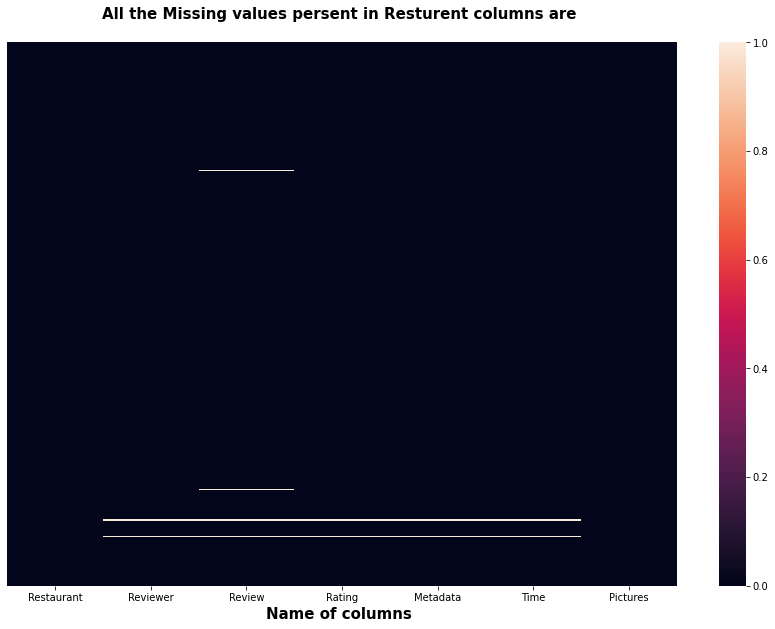

In [12]:
# Visualizing the missing values
plt.figure(figsize=(15,10))
sns.heatmap(review_df.isnull(), cbar=True , yticklabels= False)
plt.xlabel('Name of columns ', size =15, weight='bold')
plt.title('All the Missing values persent in Resturent columns are \n', fontweight= 'bold', size=15)

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
print(f' The columns persent in the Resurent dataset \n')

print(resturent_df.columns.to_list() ,'\n')
print('--'*50 )
print(f'\n The columns persent in review dataset \n')
print(review_df.columns.to_list())

 The columns persent in the Resurent dataset 

['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'] 

----------------------------------------------------------------------------------------------------

 The columns persent in review dataset 

['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']


In [14]:
# Dataset Describe
resturent_df.describe().T

,count,unique,top,freq
Name,105,105,Beyond Flavours,1
Links,105,105,https://www.zomato.com/hyderabad/beyond-flavou...,1
Cost,105,29,500,13
Collections,51,42,Food Hygiene Rated Restaurants in Hyderabad,4
Cuisines,105,92,"North Indian, Chinese",4
Timings,104,77,11 AM to 11 PM,6


In [15]:
# Dataset Describe
review_df.describe()

,Pictures
count,10000.000000
mean,0.748600
std,2.570381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.
print('Number of unique variable persent in the Resturent dataset')
print(resturent_df.nunique())

print('--'*50)
print('Number of unique variabele persent in Review dataset')
print(review_df.nunique())

Number of unique variable persent in the Resturent dataset
Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64
----------------------------------------------------------------------------------------------------
Number of unique variabele persent in Review dataset
Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64


In [17]:
# Code to find unique item in each variable of Resturent dataset
for col in resturent_df.columns.tolist():
  print(f' The Uniue values of  Resturent dataset varibles -- {col} = \n \n',  resturent_df[col].unique(),'\n')
  print('--'*50)

 The Uniue values of  Resturent dataset varibles -- Name = 
 
 ['Beyond Flavours' 'Paradise' 'Flechazo' 'Shah Ghouse Hotel & Restaurant'
 'Over The Moon Brew Company' "The Fisherman's Wharf" 'eat.fit'
 'Shah Ghouse Spl Shawarma' 'Hyper Local' 'Cream Stone'
 "Sardarji's Chaats & More" 'Barbeque Nation' 'Absolute Sizzlers'
 'The Lal Street - Bar Exchange' "AB's - Absolute Barbecues" 'KFC'
 'NorFest - The Dhaba' 'Hotel Zara Hi-Fi' '10 Downing Street'
 'Pakwaan Grand' '13 Dhaba'
 "Jonathan's Kitchen - Holiday Inn Express & Suites" 'B-Dubs' 'Amul'
 'SKYHY' 'Tiki Shack' 'Mustang Terrace Lounge'
 "3B's - Buddies, Bar & Barbecue" 'Behrouz Biryani' 'Hunger Maggi Point'
 'Pot Pourri' 'Pista House' 'Marsala Food Company' 'Club Rogue'
 'Mazzo - Marriott Executive Apartments' 'Green Bawarchi Restaurant'
 'Banana Leaf Multicuisine Restaurant' 'Kritunga Restaurant'
 'The Glass Onion' 'Deli 9 Bistro' 'Frio Bistro' 'Karachi Bakery'
 'Karachi Cafe' 'The Foodie Monster Kitchen' 'La La Land - Bar & Kitche

In [18]:
# Code to find unique item in each variable of Resturent dataset
for col2 in review_df.columns.tolist():
  print(f'The Uniue values persent in  {col2} : \n \n {review_df[col2].unique()} \n')
  print('--'*50)

The Uniue values persent in  Restaurant : 
 
 ['Beyond Flavours' 'Paradise' 'Flechazo' 'Shah Ghouse Hotel & Restaurant'
 'Over The Moon Brew Company' "The Fisherman's Wharf" 'eat.fit'
 'Shah Ghouse Spl Shawarma' 'Hyper Local' 'Cream Stone'
 "Sardarji's Chaats & More" 'Barbeque Nation' 'Absolute Sizzlers'
 'The Lal Street - Bar Exchange' "AB's - Absolute Barbecues" 'KFC'
 'NorFest - The Dhaba' 'Hotel Zara Hi-Fi' '10 Downing Street'
 'Pakwaan Grand' '13 Dhaba'
 "Jonathan's Kitchen - Holiday Inn Express & Suites" 'B-Dubs' 'Amul'
 'SKYHY' 'Tiki Shack' 'Mustang Terrace Lounge'
 "3B's - Buddies, Bar & Barbecue" 'Behrouz Biryani' 'Hunger Maggi Point'
 'Pot Pourri' 'Pista House' 'Marsala Food Company' 'Club Rogue'
 'Mazzo - Marriott Executive Apartments' 'Green Bawarchi Restaurant'
 'Banana Leaf Multicuisine Restaurant' 'Kritunga Restaurant'
 'The Glass Onion' 'Deli 9 Bistro' 'Frio Bistro' 'Karachi Bakery'
 'Karachi Cafe' 'The Foodie Monster Kitchen' 'La La Land - Bar & Kitchen'
 'Owm Nom Nom'

In [19]:
# Check Unique Values for each variable.
for col2 in review_df.columns.tolist():
  print(f"The Uniue values persent in columns ''{col2}''  :\n \n", review_df[col2].unique())
  print()
  print('--'*50)

The Uniue values persent in columns ''Restaurant''  :
 
 ['Beyond Flavours' 'Paradise' 'Flechazo' 'Shah Ghouse Hotel & Restaurant'
 'Over The Moon Brew Company' "The Fisherman's Wharf" 'eat.fit'
 'Shah Ghouse Spl Shawarma' 'Hyper Local' 'Cream Stone'
 "Sardarji's Chaats & More" 'Barbeque Nation' 'Absolute Sizzlers'
 'The Lal Street - Bar Exchange' "AB's - Absolute Barbecues" 'KFC'
 'NorFest - The Dhaba' 'Hotel Zara Hi-Fi' '10 Downing Street'
 'Pakwaan Grand' '13 Dhaba'
 "Jonathan's Kitchen - Holiday Inn Express & Suites" 'B-Dubs' 'Amul'
 'SKYHY' 'Tiki Shack' 'Mustang Terrace Lounge'
 "3B's - Buddies, Bar & Barbecue" 'Behrouz Biryani' 'Hunger Maggi Point'
 'Pot Pourri' 'Pista House' 'Marsala Food Company' 'Club Rogue'
 'Mazzo - Marriott Executive Apartments' 'Green Bawarchi Restaurant'
 'Banana Leaf Multicuisine Restaurant' 'Kritunga Restaurant'
 'The Glass Onion' 'Deli 9 Bistro' 'Frio Bistro' 'Karachi Bakery'
 'Karachi Cafe' 'The Foodie Monster Kitchen' 'La La Land - Bar & Kitchen'
 'O

## 3. ***Data Wrangling***

### Data Wrangling Code

#### Wrangling Resturent  Dataset:

Wrangling on Cost feature/variable

In [105]:
# Write your code to make your dataset analysis ready.
resturent_df['Cost'].unique()

array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600', '750', '550', '1,900', '450', '150', '1,400',
       '1,100', '600', '200', '900', '700', '1,700', '2,500', '850',
       '650', '1,800', '2,800', '1,750', '250'], dtype=object)

In [106]:
# Remove the ',' from the cost varible 
resturent_df['Cost']= resturent_df['Cost'].str.replace(',','').astype('int64')

In [107]:
# Find out the  top 10 costly resturent 
Top_10_Expensive_Restuent=resturent_df.sort_values('Cost', ascending=False)[['Name', 'Cost']][:10]
Top_10_Expensive_Restuent

,Name,Cost
92,Collage - Hyatt Hyderabad Gachibowli,2800
56,Feast - Sheraton Hyderabad Hotel,2500
21,Jonathan's Kitchen - Holiday Inn Express & Suites,1900
18,10 Downing Street,1900
91,Cascade - Radisson Hyderabad Hitec City,1800
97,Zega - Sheraton Hyderabad Hotel,1750
104,Republic Of Noodles - Lemon Tree Hotel,1700
34,Mazzo - Marriott Executive Apartments,1700
90,Arena Eleven,1600
11,Barbeque Nation,1600


In [108]:
# Find out 10 economicaly  resturent 
Top_10_cheapest_resturent=resturent_df.sort_values('Cost', ascending=True)[['Name', 'Cost']][:10]
Top_10_cheapest_resturent

,Name,Cost
89,Mohammedia Shawarma,150
23,Amul,150
54,Asian Meal Box,200
101,Sweet Basket,200
59,KS Bakers,200
85,Momos Delight,200
29,Hunger Maggi Point,200
103,Wich Please,250
7,Shah Ghouse Spl Shawarma,300
58,Tempteys,350


Wrangling on Collection feature/variable

In [109]:
# spliting the Collection and storing in list 
Collections_list = resturent_df.Collections.dropna().str.split(', ')

In [110]:
# storing all the cusines in a dict 
Collections_dict = {}
for collection in Collections_list:
    for col_name in collection:
        if (col_name in Collections_dict):
            Collections_dict[col_name]+=1
        else:  
            Collections_dict[col_name]=1 

In [111]:

# converting the dict to a data frame 
Collections_df=pd.DataFrame.from_dict([Collections_dict]).transpose().reset_index().rename(columns={'index':'Tags',0:'Number_of_Restaurants'})
     

In [112]:
#top 10 collection
Collections_df.sort_values('Number_of_Restaurants', ascending =False)[:10]

,Tags,Number_of_Restaurants
2,Great Buffets,11
0,Food Hygiene Rated Restaurants in Hyderabad,8
5,Live Sports Screenings,7
6,Hyderabad's Hottest,7
1,Corporate Favorites,6
3,Top-Rated,5
4,Gold Curated,5
10,Trending This Week,5
9,Sunday Brunches,4
13,Veggie Friendly,4


Wrangling on Cuisine variable

In [113]:
# store type of food in a a list with spliting all the food
cuisine_list =resturent_df.Cuisines.str.split(', ')

In [114]:
# storing all the cusines in a dict 
cuisine_dict = {}
for cuisine_names in cuisine_list:
    for cuisine in cuisine_names:
        if (cuisine in cuisine_dict):
            cuisine_dict[cuisine]+=1
        else:  
            cuisine_dict[cuisine]=1 

In [115]:
# converting the dict to a data frame 
cuisine_df=pd.DataFrame.from_dict([cuisine_dict]).transpose().reset_index().rename(columns={'index':'Type_of_Food',0:'Number_of_Restaurants'})

In [116]:

#top 10 cuisine
cusine_of_the_data=cuisine_df.sort_values('Number_of_Restaurants', ascending =False)
cusine_of_the_data[:10]

,Type_of_Food,Number_of_Restaurants
5,North Indian,61
0,Chinese,43
1,Continental,21
6,Biryani,16
18,Fast Food,15
7,Asian,15
20,Italian,14
9,Desserts,13
4,South Indian,9
29,Bakery,7


### Review :

Wrengling on Rating variable/Feature

In [117]:
review_df['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like', nan],
      dtype=object)

In [135]:
review_df['Rating'].value_counts()

5.0    3832
4.0    2373
1.0    1735
3.0    1193
2.0     684
3.5      86
4.5      69
2.5      19
1.5       9
Name: Rating, dtype: int64

In [118]:
# convert Like into nan and type  of data
review_df.loc[review_df['Rating']=='Like']=np.nan
review_df['Rating']= review_df['Rating'].astype('float')

# Fill Null values by mean
review_df['Rating'].fillna(3.5, inplace=True)
review_df['Rating'].unique()


array([5. , 4. , 1. , 3. , 2. , 3.5, 4.5, 2.5, 1.5])

Wrengling on Metadata variable/Feature

In [119]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0.0


In [120]:
# split metadata column into 2 columns i.e. Reviews and followers

review_df['Reviews'],review_df['Followers']= review_df['Metadata'].str.split(',').str
review_df['Reviews'] = pd.to_numeric(review_df['Reviews'].str.split(' ').str[0])
review_df['Followers']= pd.to_numeric(review_df['Followers'].str.split(' ').str[1])

# Drop the Metadata columns
review_df = review_df.drop(['Metadata'], axis =1)
review_df.head()

<ipython-input-120-1a438cc36939>:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  review_df['Reviews'],review_df['Followers']= review_df['Metadata'].str.split(',').str


,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,5/25/2019 15:54,0.0,1.0,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,5/25/2019 14:20,0.0,3.0,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,5/24/2019 22:54,0.0,2.0,3.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,5/24/2019 22:11,0.0,1.0,1.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,5/24/2019 21:37,0.0,3.0,2.0


In [121]:
# Split the Time columns into Year Month and Hours
review_df['Year'] = pd.DatetimeIndex(review_df['Time']).year
review_df['Month'] = pd.DatetimeIndex(review_df['Time']).month
review_df['Hour'] = pd.DatetimeIndex(review_df['Time']).hour
review_df.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,5/25/2019 15:54,0.0,1.0,2.0,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,5/25/2019 14:20,0.0,3.0,2.0,2019.0,5.0,14.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,5/24/2019 22:54,0.0,2.0,3.0,2019.0,5.0,22.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,5/24/2019 22:11,0.0,1.0,1.0,2019.0,5.0,22.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,5/24/2019 21:37,0.0,3.0,2.0,2019.0,5.0,21.0


In [165]:
# code to find top reviewer
reviewer_list = review_df.groupby('Reviewer').apply(lambda x: x['Reviewer'].count()).reset_index(name='Review_Count')
reviewer_list = reviewer_list.sort_values(by = 'Review_Count',ascending=False)
top_10_reviewers = reviewer_list[:10]
top_10_reviewers

,Reviewer,Review_Count
655,Ankita,13
3858,Parijat Ray,13
2654,Kiran,12
2313,Jay Mehta,11
7013,Vedant Killa,11
5958,Siva Kumar,10
4259,Priyanka,10
6130,Sravani,10
3134,Manojkumar D Nambisan,10
265,Age Of Foodies (Suraj Karambe),10


In [177]:
# Average of the ratings of reviewers with review count
review_ratings=review_df.groupby('Reviewer').apply(lambda x:np.average(x['Rating'])).reset_index(name='Average_Ratings')
review_ratings=pd.merge(top_10_reviewers,review_ratings,how='inner',left_on='Reviewer',right_on='Reviewer')
top_10_reviewers_ratings=review_ratings[:10]
top_10_reviewers_ratings=top_10_reviewers_ratings.sort_values(by = 'Average_Ratings',ascending=False)
top_10_reviewers_ratings.head(10)

,Reviewer,Review_Count,Average_Ratings
2,Kiran,12,4.500000
4,Vedant Killa,11,4.000000
7,Sravani,10,4.000000
0,Ankita,13,3.923077
3,Jay Mehta,11,3.727273
8,Manojkumar D Nambisan,10,3.700000
5,Siva Kumar,10,3.600000
9,Age Of Foodies (Suraj Karambe),10,3.500000
1,Parijat Ray,13,3.192308
6,Priyanka,10,2.600000


In [185]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,5/25/2019 15:54,0.0,1.0,2.0,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,5/25/2019 14:20,0.0,3.0,2.0,2019.0,5.0,14.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,5/24/2019 22:54,0.0,2.0,3.0,2019.0,5.0,22.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,5/24/2019 22:11,0.0,1.0,1.0,2019.0,5.0,22.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,5/24/2019 21:37,0.0,3.0,2.0,2019.0,5.0,21.0


In [189]:
#Finding the most followed critic
most_followed_reviewer = review_df.groupby('Reviews').agg({'Reviewer':'max','Followers':'max', 'Rating':'mean'}).reset_index().rename(columns = {
          'Rating':'Average_Rating_Given'}).sort_values('Followers', ascending = False)
most_followed_reviewer[:10]

,Reviews,Reviewer,Followers,Average_Rating_Given
165,186.0,Satwinder Singh,13410.0,3.666667
60,60.0,Tirtha Das,13320.0,3.852941
8,8.0,Yaksh. Pgpm16c,11329.0,3.663842
31,31.0,Syed Ghouse Mohiuddin,9494.0,3.979167
34,34.0,Yashmita Hota,7628.0,3.907407
30,30.0,The Binge Journal,7589.0,3.794872
98,98.0,Vineet R,6931.0,3.071429
35,35.0,Ujj,5873.0,4.102941
63,63.0,Vibhor Dhote,5715.0,3.868421
129,130.0,YatenJaiswal,5533.0,3.750000


In [122]:
#merging both data frame
resturent_df = resturent_df.rename(columns = {'Name':'Restaurant'})
merged_df = resturent_df.merge(review_df, on = 'Restaurant')
merged_df.shape

(9999, 16)

In [124]:
merged_df.head()

,Restaurant,Links,Cost,Collections,Cuisines,Timings,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,5/25/2019 15:54,0.0,1.0,2.0,2019.0,5.0,15.0
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,5/25/2019 14:20,0.0,3.0,2.0,2019.0,5.0,14.0
2,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,5/24/2019 22:54,0.0,2.0,3.0,2019.0,5.0,22.0
3,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,5/24/2019 22:11,0.0,1.0,1.0,2019.0,5.0,22.0
4,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,5/24/2019 21:37,0.0,3.0,2.0,2019.0,5.0,21.0


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1  Distrbution plot of Cost, Rating, Year 

<ipython-input-123-6100cdec70fa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_df[col], color = '#055E85');
<ipython-input-123-6100cdec70fa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_df[col], color = '#055E85');
<ipython-input-123-6100cdec70fa>:6: UserWarning: 

`distplot

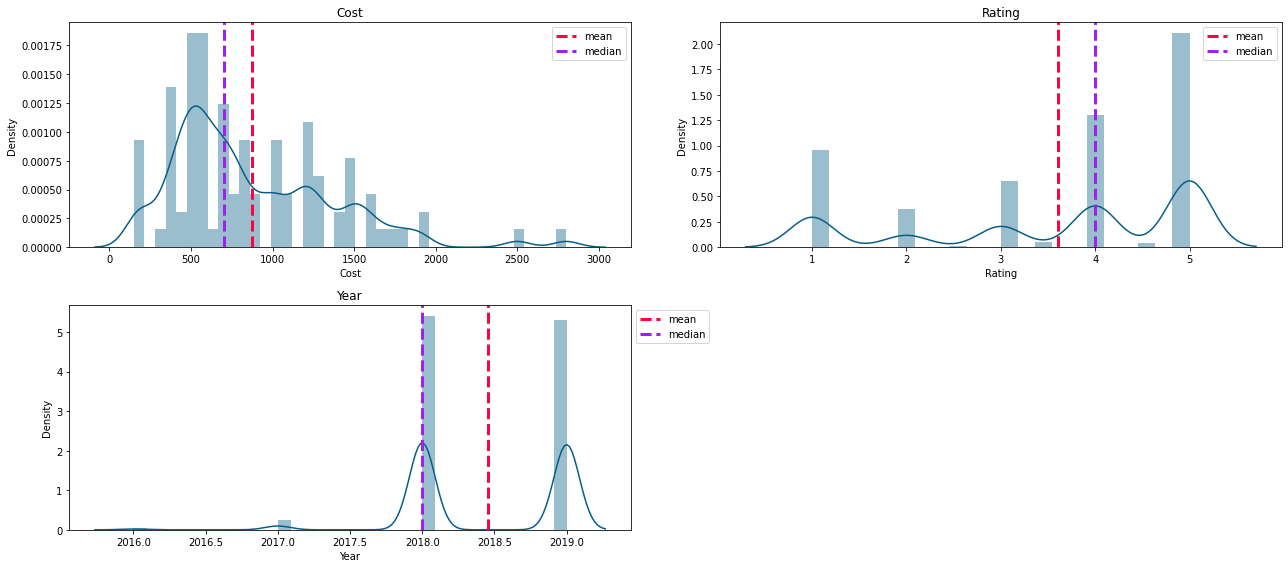

In [123]:
# Chart - 9 visualization code
plt.figure(figsize = (18,8));
for i,col in enumerate(['Cost','Rating','Year']) :
    # plt.figure(figsize = (8,5));
    plt.subplot(2,2,i+1);
    sns.distplot(merged_df[col], color = '#055E85');
    feature = merged_df[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    plt.legend(bbox_to_anchor = (1.0, 1))
    plt.title(f'{col.title()}');
    plt.tight_layout();

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer :

#### Chart - 2

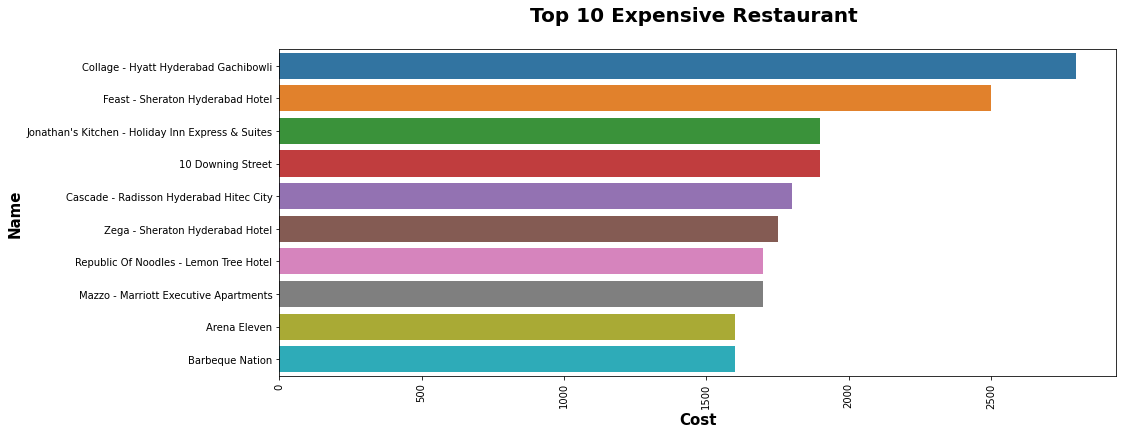

In [ ]:
# Chart - 1 visualization code fro Top 10 Expensive Reaturent
# Top 10 Expensive Restaurants
plt.figure(figsize=(15,6))
x = Top_10_Expensive_Restuent['Cost']
y = Top_10_Expensive_Restuent['Name']
plt.title("Top 10 Expensive Restaurant \n",fontsize=20,weight='bold')
plt.xlabel("Cost",weight='bold',fontsize=15)
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y)
plt.show()

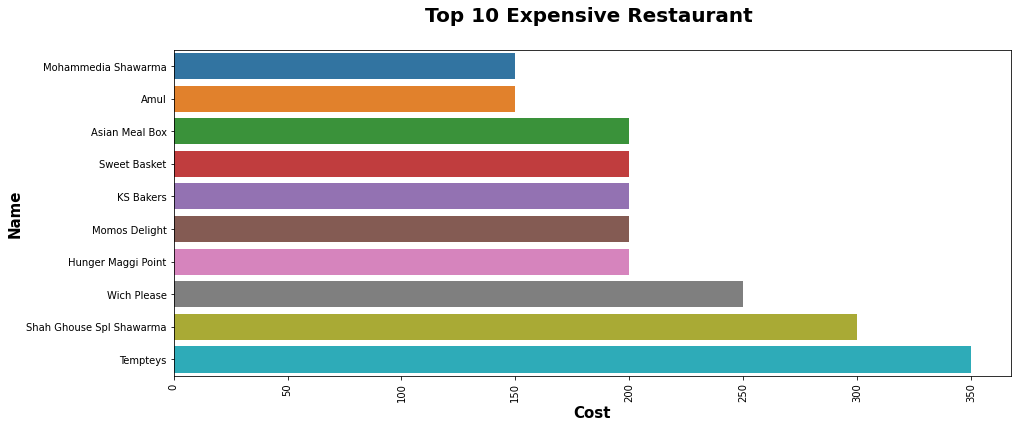

In [ ]:
# Chart - 1 visualization code fro Top 10 Expensive Reaturent

plt.figure(figsize=(15,6))
x = Top_10_cheapest_resturent['Cost']
y = Top_10_cheapest_resturent['Name']
plt.title("Top 10 Expensive Restaurant \n",fontsize=20,weight='bold')
plt.xlabel("Cost",weight='bold',fontsize=15)
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

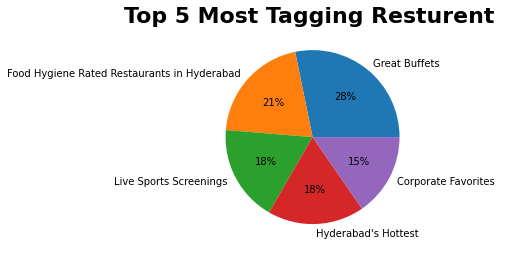

In [ ]:
# Chart - 2 visualization code pie chart for top 5 Tagging Resturent

collection_list = Collections_df.sort_values('Number_of_Restaurants', ascending = False)['Tags'].tolist()[:5]
data = Collections_df.sort_values('Number_of_Restaurants', ascending = False) ['Number_of_Restaurants'].tolist()[:5]
labels = collection_list


#create pie chart
plt.pie(data, labels = labels,  autopct='%.0f%%')
plt.title('Top 5 Most Tagging Resturent ', size =22, weight='bold')
plt.show()

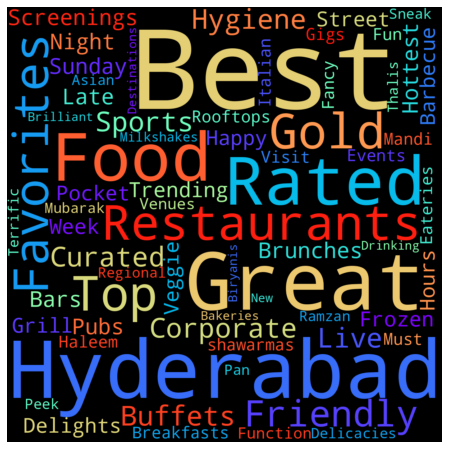

In [ ]:

#wordcloud for Cuisine
# storind all cuisine in form of text
plt.figure(figsize=(15,8))
text = " ".join(name for name in Collections_df.Tags )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, 
                      colormap='rainbow', background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear');

plt.axis("off");

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

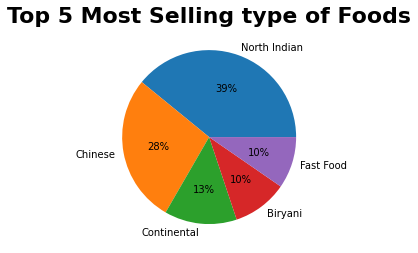

In [ ]:
# Chart - 3 visualization code pie chart for top 5 most selling cuisine
cuisine_list = cuisine_df.sort_values('Number_of_Restaurants', ascending = False)['Type_of_Food'].tolist()[:5]
data = cuisine_df.sort_values('Number_of_Restaurants', ascending = False)['Number_of_Restaurants'].tolist()[:5]
labels = cuisine_list

#create pie chart
plt.pie(data, labels = labels,  autopct='%.0f%%')
plt.title('Top 5 Most Selling type of Foods', size =22, weight ='bold', )
plt.show()

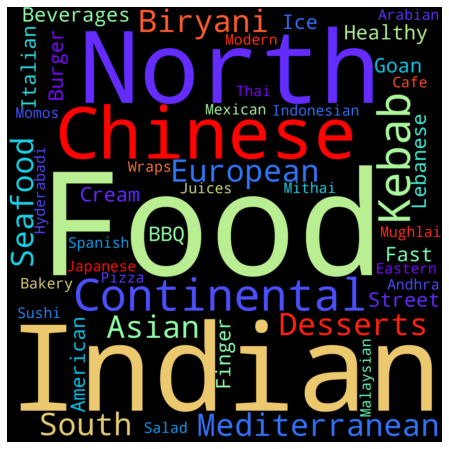

In [ ]:
#wordcloud for Cuisine
# storind all cuisine in form of text
plt.figure(figsize=(15,8))
text = " ".join(name for name in cuisine_df.Type_of_Food )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 2000, height = 2000, collocations = False, colormap='rainbow', background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear');

plt.axis("off");

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

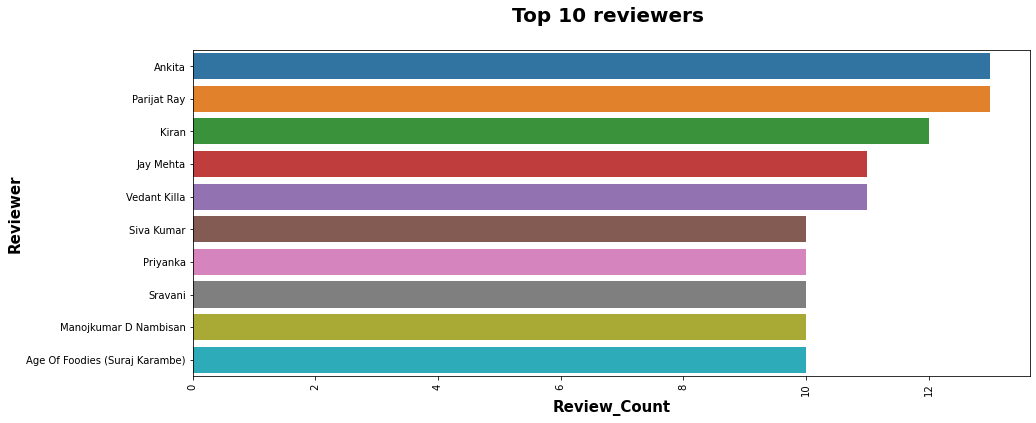

In [181]:
# top reviewers that have more review
plt.figure(figsize=(15,6))
x = top_10_reviewers['Review_Count']
y = top_10_reviewers['Reviewer']
plt.title("Top 10 reviewers \n",fontsize=20, weight='bold')
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("No. of Reviews",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y)
plt.show()

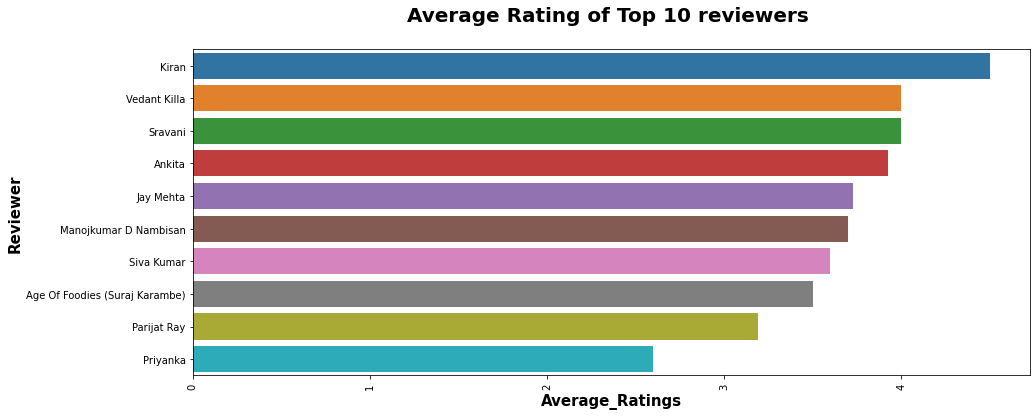

In [179]:
# Average rating of top reviewers
plt.figure(figsize=(15,6))
x = top_10_reviewers_ratings['Average_Ratings']
y = top_10_reviewers_ratings['Reviewer']
plt.title("Average Rating of Top 10 reviewers \n",fontsize=20, weight='bold')
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("Average Rating",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y)
plt.show()

In [183]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,5/25/2019 15:54,0.0,1.0,2.0,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,5/25/2019 14:20,0.0,3.0,2.0,2019.0,5.0,14.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,5/24/2019 22:54,0.0,2.0,3.0,2019.0,5.0,22.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,5/24/2019 22:11,0.0,1.0,1.0,2019.0,5.0,22.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,5/24/2019 21:37,0.0,3.0,2.0,2019.0,5.0,21.0


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

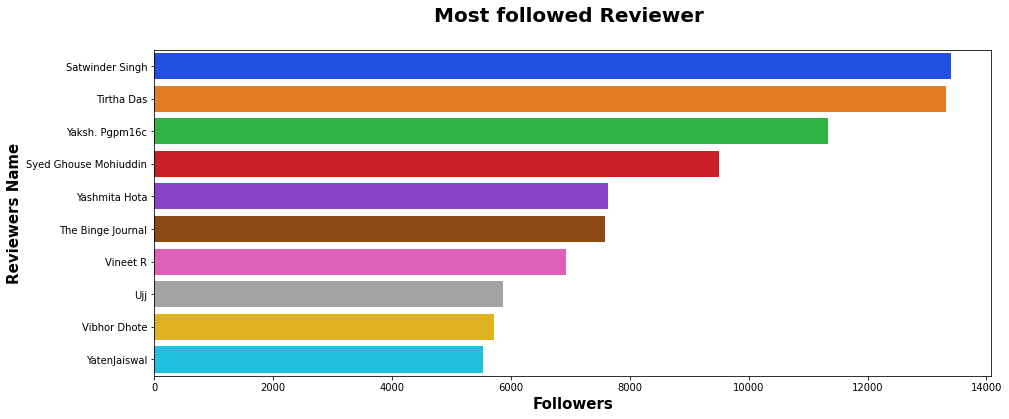

In [196]:
# visualization code for most review follower
plt.figure(figsize=(15,6))
sns.barplot(data = most_followed_reviewer[:10], x = 'Followers', y = 'Reviewer',palette='bright')
plt.title('Most followed Reviewer \n',fontsize=20, weight = 'bold')
plt.ylabel("Reviewers Name",weight='bold',fontsize=15)
plt.xlabel("Followers",weight='bold',fontsize=15)
plt.show()

(-0.5, 1399.5, 1399.5, -0.5)

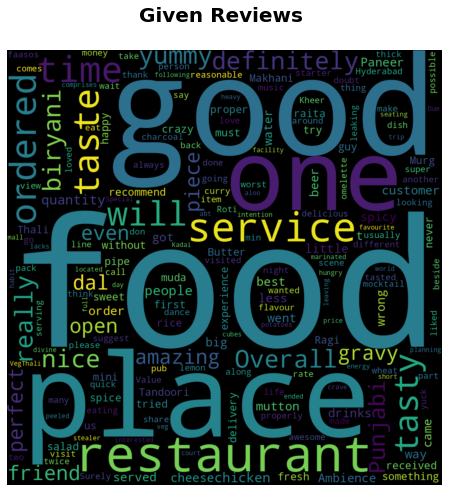

In [198]:
#Creating word cloud for reviews
plt.figure(figsize=(15,8))
text = " ".join(name for name in review_df.sort_values('Review',ascending=False).Review[:30])


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.title('Given Reviews \n',fontsize=20, weight = 'bold')
plt.axis("off")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

(array([1735.,    9.,  684.,   19.,    0., 1193.,   86., 2373.,   69.,
        3832.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

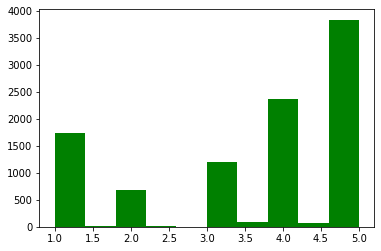

In [142]:
# Chart - 10 visualization code
plt.hist(review_df['Rating'].values, color='green')

(array([  43.,    0.,    0.,  213.,    0.,    0., 4903.,    0.,    0.,
        4802.]),
 array([2016. , 2016.3, 2016.6, 2016.9, 2017.2, 2017.5, 2017.8, 2018.1,
        2018.4, 2018.7, 2019. ]),
 <BarContainer object of 10 artists>)

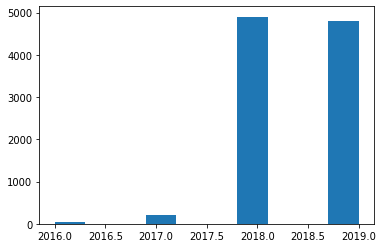

In [143]:
plt.hist(review_df['Year'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<Axes: >

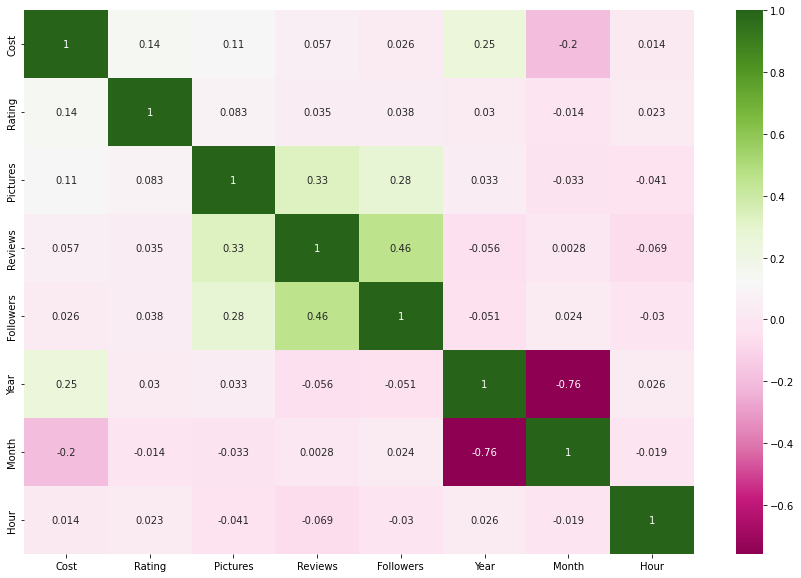

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,10))
sns.heatmap(merged_df.corr(), cmap ='PiYG', annot = True)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

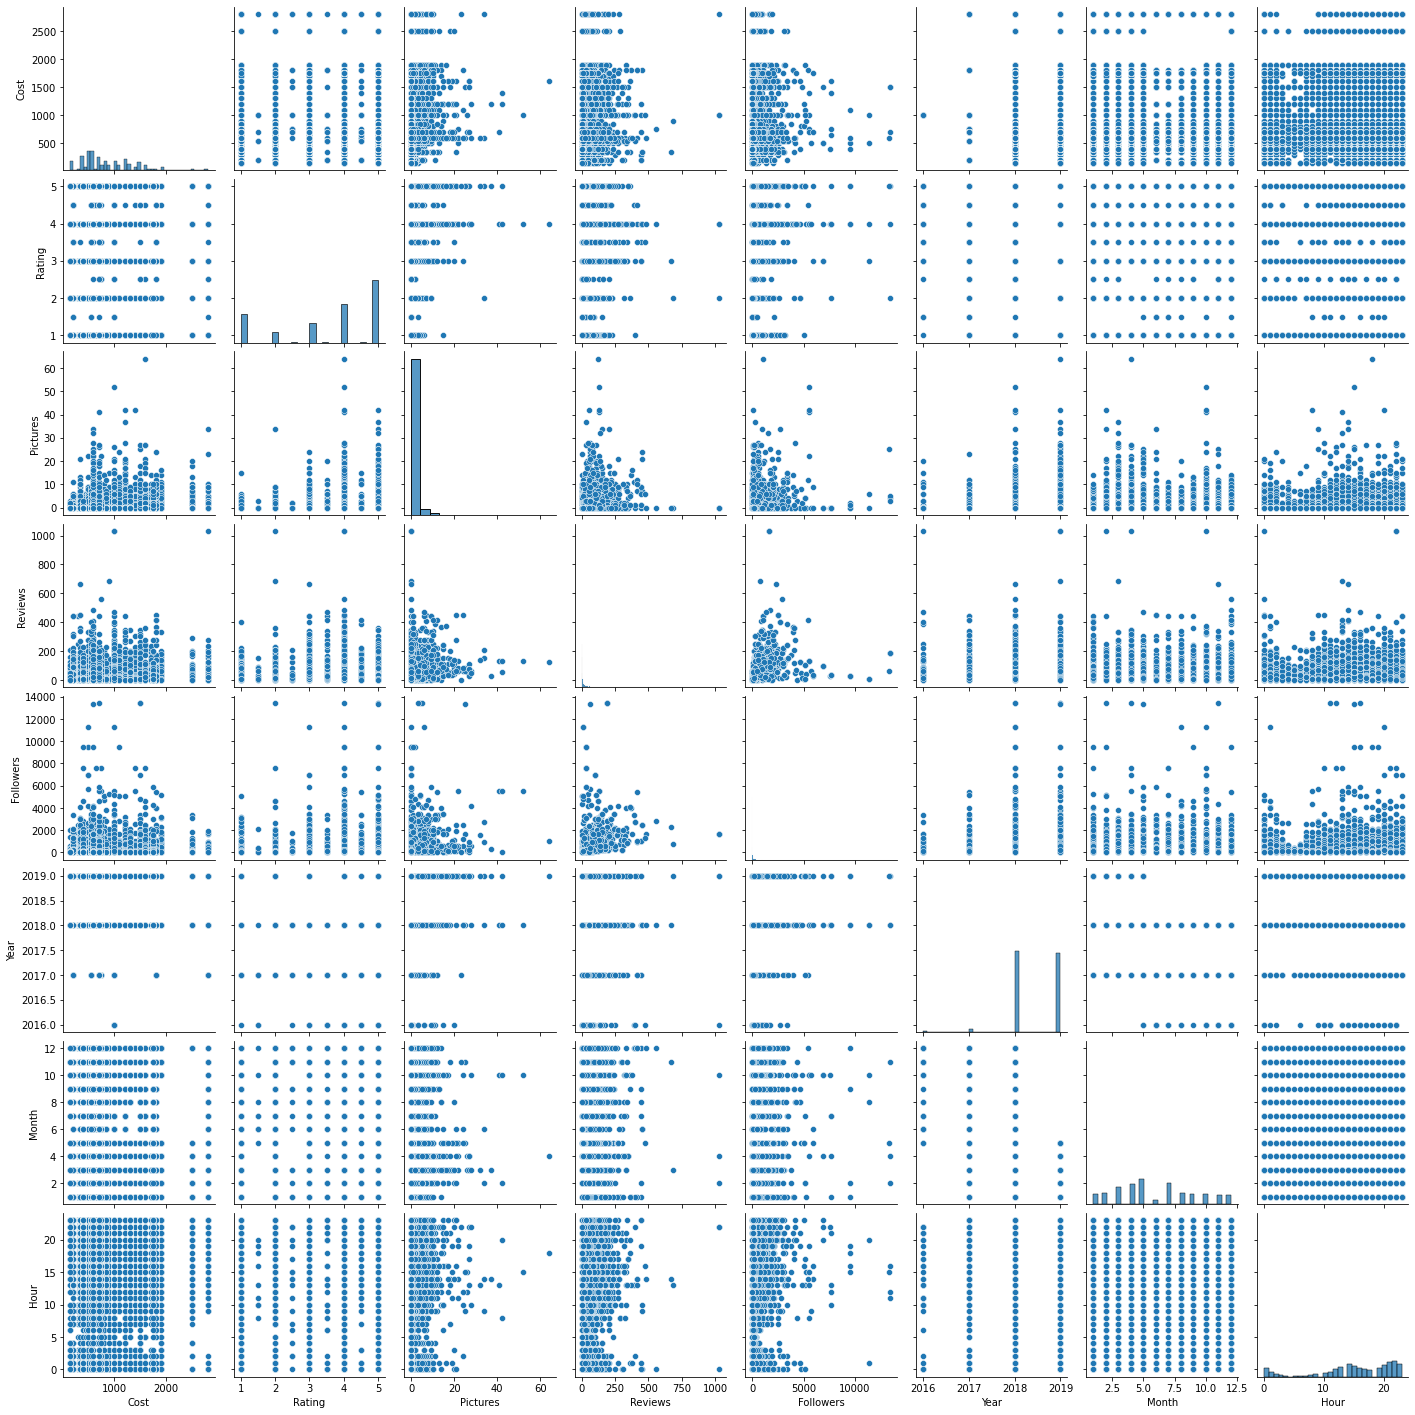

In [ ]:
# Pair Plot visualization code
sns.pairplot(merged_df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

Heandle Duplicate Values from the dataset

In [ ]:
# Check the duplcate values persent in the data set
print(f'Total number of Duplicate Value persent in Restuent datast set {resturent_df.duplicated().sum()} \n')
print(f'Total number of Duplicate Value persent in Review datast set {review_df.duplicated().sum()}')

Total number of Duplicate Value persent in Restuent datast set 0 

Total number of Duplicate Value persent in Review datast set 36


In [ ]:
# Drop Duplicate values from the dataset

review_df.drop_duplicates(inplace= True)

# check the duplcate value after drop

print(f'Total numer of Duplicate Value persent in Restuent datast set {resturent_df.duplicated().sum()} \n')
print(f'Total numer of Duplicate Value persent in Review datast set {review_df.duplicated().sum()}')

Total numer of Duplicate Value persent in Restuent datast set 0 

Total numer of Duplicate Value persent in Review datast set 0


In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***